# Input Analysis

This notebook contains our analysis of the input data ([MovieLens 1M](http://grouplens.org/datasets/movielens/)) to understand the basic demographic distribution before we run experiments.

## Setup

First, we want to load some libraries.

In [1]:
library(dplyr)
library(readr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
options(repr.plot.height=5)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.columns=10)

## Load Data

We want to read the ML-1M ratings file:

In [3]:
ratings = read_delim("data/ml-1m/ratings.dat", delim=":",
                     col_names=c("user", "item", "rating", "timestamp"),
                     col_types="i_i_i_i")

In [4]:
ratings

user,item,rating,timestamp
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
1,1197,3,978302268
1,1287,5,978302039
1,2804,5,978300719
1,594,4,978302268
1,919,4,978301368


In [5]:
users = read_delim("data/ml-1m/users.dat", delim=":",
                   col_names=c("user", "gender", "age", "occupation", "zip"),
                   col_types="i_c_c_c_c") %>%
    mutate(gender=as.factor(gender),
           age=as.factor(age),
           occupation=as.factor(occupation))
users

user,gender,age,occupation,zip
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
7,M,35,1,06810
8,M,25,12,11413
9,M,25,17,61614
10,F,35,1,95370


In [6]:
item.stats = ratings %>%
    group_by(item) %>%
    summarize(RatingCount=n(),
              MeanRating=mean(rating),
              MinRating=min(rating),
              MaxRating=max(rating)) %>%
    mutate(PopRank=rank(-RatingCount))

In [7]:
item.stats

item,RatingCount,MeanRating,MinRating,MaxRating,PopRank
1,2077,4.146846,1,5,30.0
2,701,3.201141,1,5,394.5
3,478,3.016736,1,5,650.0
4,170,2.729412,1,5,1574.0
5,296,3.006757,1,5,1067.0
6,940,3.878723,1,5,234.0
7,458,3.410480,1,5,689.5
8,68,3.014706,1,5,2290.0
9,102,2.656863,1,5,1994.0
10,888,3.540541,1,5,260.0


In [8]:
user.stats = ratings %>%
    inner_join(item.stats %>% select(item, RatingCount, PopRank)) %>%
    group_by(user) %>%
    summarize(RatingCount=n(),
              MeanRating=mean(rating),
              MinRating=min(rating),
              MaxRating=max(rating),
              MeanPopRank=mean(PopRank),
              MedRatingCount=median(RatingCount),
              AccountLifetime=max(timestamp) - min(timestamp)) %>%
    inner_join(users)

Joining, by = "item"
Joining, by = "user"


In [9]:
user.stats

user,RatingCount,MeanRating,MinRating,MaxRating,MeanPopRank,MedRatingCount,AccountLifetime,gender,age,occupation,zip
1,53,4.188679,3,5,397.9811,53,524332,F,1,10,48067
2,129,3.713178,1,5,454.5698,129,2050,M,56,16,70072
3,51,3.901961,1,5,289.4706,51,1486,M,25,15,55117
4,21,4.190476,1,5,148.5476,21,358,M,45,7,02460
5,198,3.146465,1,5,832.9268,198,5513,M,25,20,55455
6,71,3.901408,1,5,626.2958,71,2944,F,50,9,55117
7,31,4.322581,3,5,140.9516,31,317,M,35,1,06810
8,139,3.884892,2,5,658.2374,139,18354,M,25,12,11413
9,106,3.735849,2,5,356.9528,106,1819,M,25,17,61614
10,401,4.114713,2,5,589.1633,401,2414313,F,35,1,95370


## Basic Stats

How much data do we have?

In [10]:
data.frame(Users=nrow(user.stats),
           Items=nrow(item.stats),
           Ratings=nrow(ratings)) %>%
    mutate(Density=Ratings / (Users * Items))

Users,Items,Ratings,Density
6040,3706,1000209,0.04468363


Start looking at demographic splits:

In [ ]:
ggplot(users) +
    aes(x=gender,fill=dataset) +
    geom_bar()

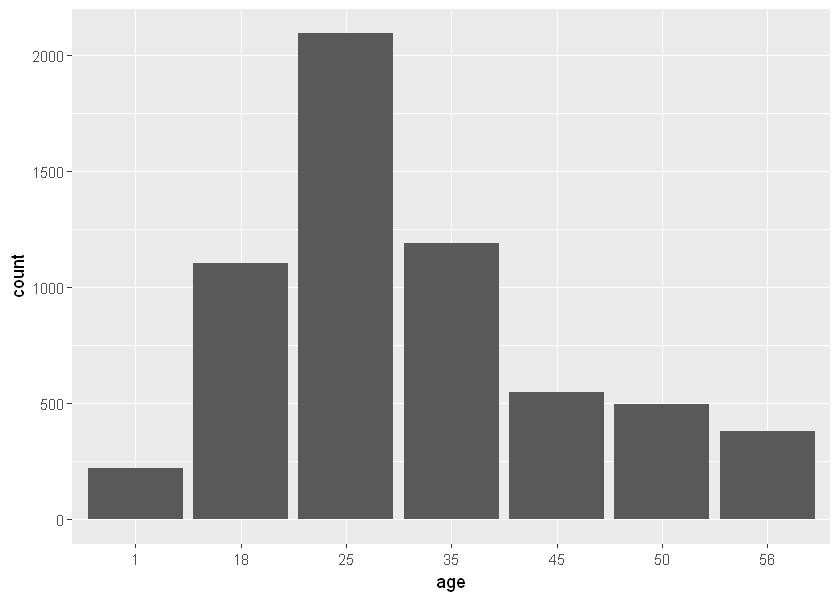

In [12]:
ggplot(users) +
    aes(x=age) +
    geom_bar()

What are the statistics of users per zip code?

In [13]:
zips = users %>%
    group_by(zip) %>%
    summarize(nusers=n())
summary(zips$nusers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.756   2.000  19.000 

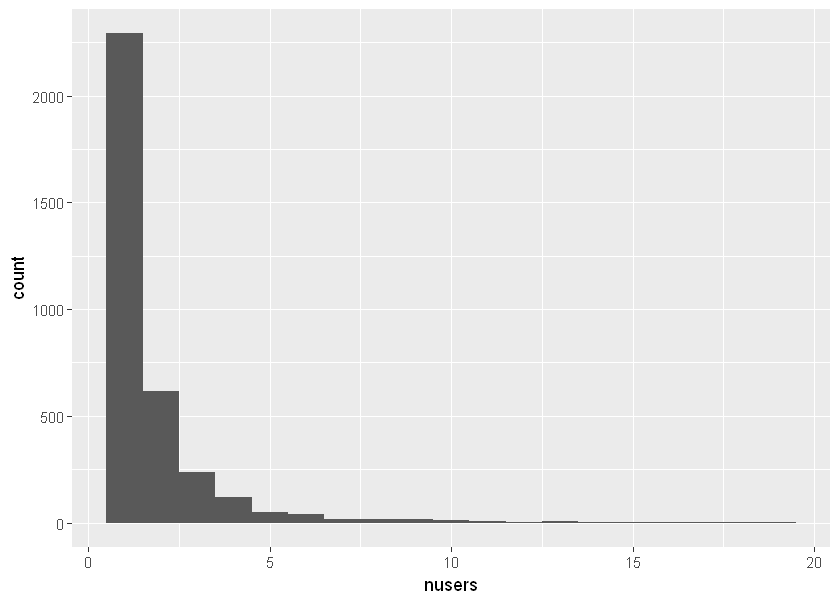

In [14]:
ggplot(zips) +
    aes(x=nusers) +
    geom_histogram(binwidth=1)

Per region?

In [15]:
regions = users %>%
    mutate(region=substr(zip, 1, 3)) %>%
    group_by(region) %>%
    summarize(nusers=n())
summary(regions$nusers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   8.909   9.000 172.000 

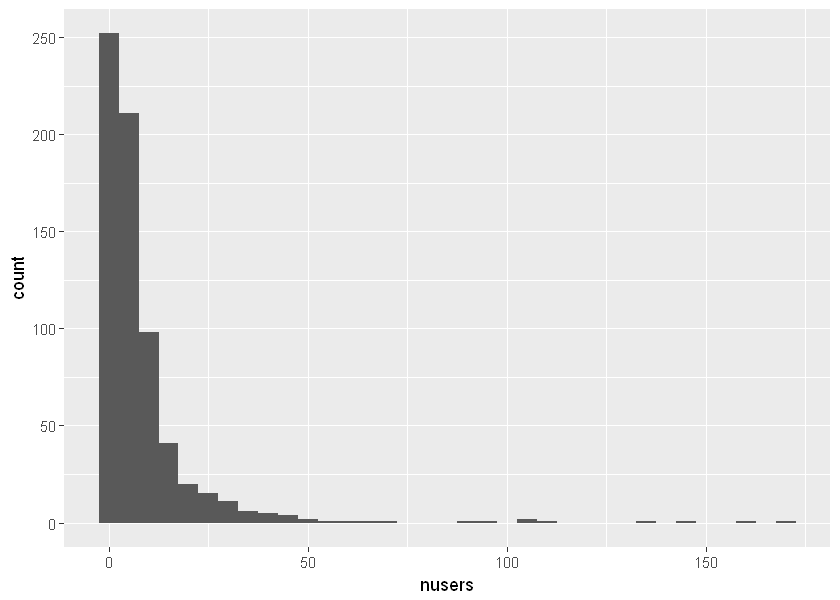

In [16]:
ggplot(regions) +
    aes(x=nusers) +
    geom_histogram(binwidth=5)

## Per-demographic rating statistics

Do different groups have more ratings?

### Gender

In [17]:
gender.stats = user.stats %>%
    group_by(gender) %>%
    summarize(NUsers=n(),
              MeanRatingCount=mean(RatingCount),
              RCErr=sd(RatingCount) / sqrt(n()),
              MeanAvgRating=mean(MeanRating),
              AvgRatingErr=sd(MeanRating) / sqrt(n()),
              MeanPop=mean(MeanPopRank))
gender.stats

gender,NUsers,MeanRatingCount,RCErr,MeanAvgRating,AvgRatingErr,MeanPop
F,1709,144.2013,4.088308,3.729465,0.01000872,616.8265
M,4331,174.0404,3.050227,3.692145,0.00661471,565.9058


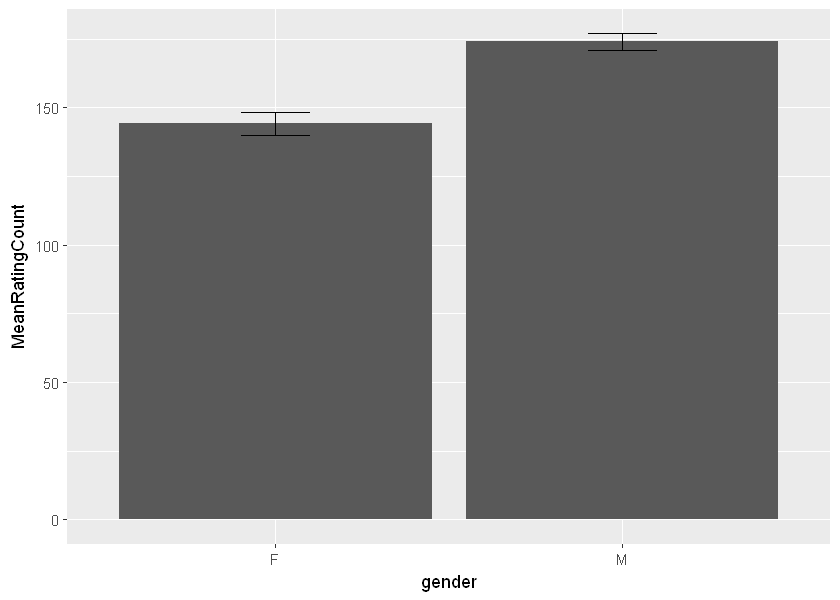

In [18]:
ggplot(gender.stats) +
    aes(x=gender, y=MeanRatingCount, 
        ymin=MeanRatingCount-RCErr,
        ymax=MeanRatingCount+RCErr) +
    geom_bar(stat="identity") + geom_errorbar(width=0.2)

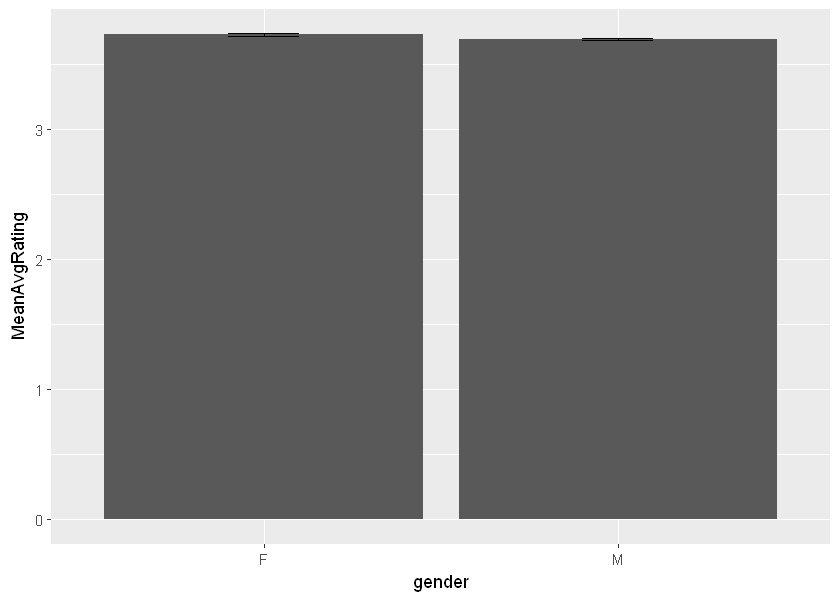

In [19]:
ggplot(gender.stats) +
    aes(x=gender, y=MeanAvgRating, 
        ymin=MeanAvgRating-AvgRatingErr,
        ymax=MeanAvgRating+AvgRatingErr) +
    geom_bar(stat="identity") + geom_errorbar(width=0.2)

Now, let's examine popularity preference.

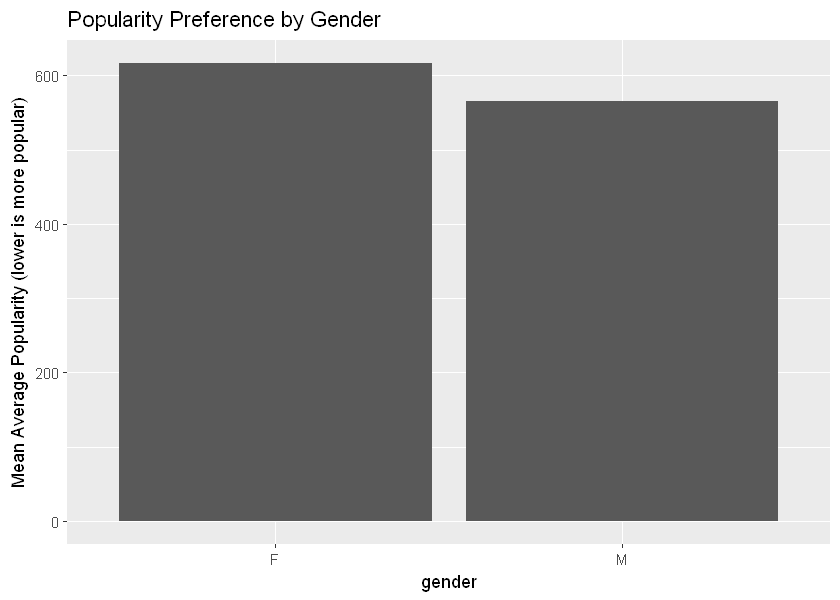

In [20]:
ggplot(gender.stats) +
    aes(x=gender, y=MeanPop) +
    geom_bar(stat="identity") +
    ylab("Mean Average Popularity (lower is more popular)") +
    ggtitle("Popularity Preference by Gender")

Male users - of which there are considerably more - tend to rate more popular movies. This is expected - the dominant group's movies will, by nature, be more popular - but it does document that demographics and popularity will confound.

### Age

In [21]:
age.stats = user.stats %>%
    group_by(age) %>%
    summarize(NUsers=n(),
              MeanRatingCount=mean(RatingCount),
              RCErr=sd(RatingCount) / sqrt(n()),
              MeanAvgRating=mean(MeanRating),
              AvgRatingErr=sd(MeanRating) / sqrt(n()),
              MeanPop=mean(MeanPopRank))
age.stats

age,NUsers,MeanRatingCount,RCErr,MeanAvgRating,AvgRatingErr,MeanPop
1,222,122.5721,9.222686,3.621055,0.031579911,646.8739
18,1103,166.3971,5.523255,3.620671,0.013457093,554.2323
25,2096,188.7195,4.549564,3.667680,0.009041619,551.3487
35,1193,166.8089,5.748490,3.743372,0.011960702,572.7603
45,550,152.0600,8.180004,3.770965,0.017591735,620.9656
50,496,146.1492,8.069795,3.795452,0.018509621,630.7887
56,380,102.0526,6.275718,3.834176,0.023388193,675.8898


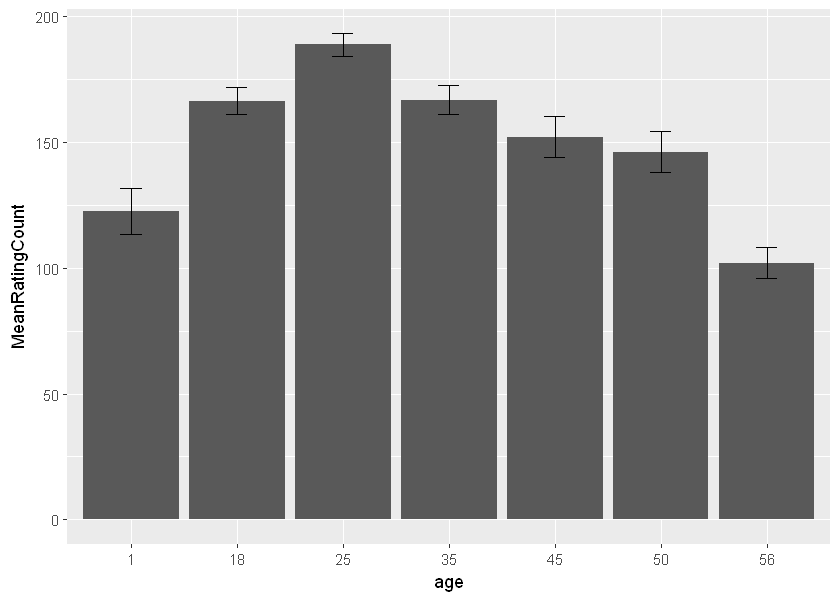

In [22]:
ggplot(age.stats) +
    aes(x=age, y=MeanRatingCount, 
        ymin=MeanRatingCount-RCErr,
        ymax=MeanRatingCount+RCErr) +
    geom_bar(stat="identity") + geom_errorbar(width=0.2)

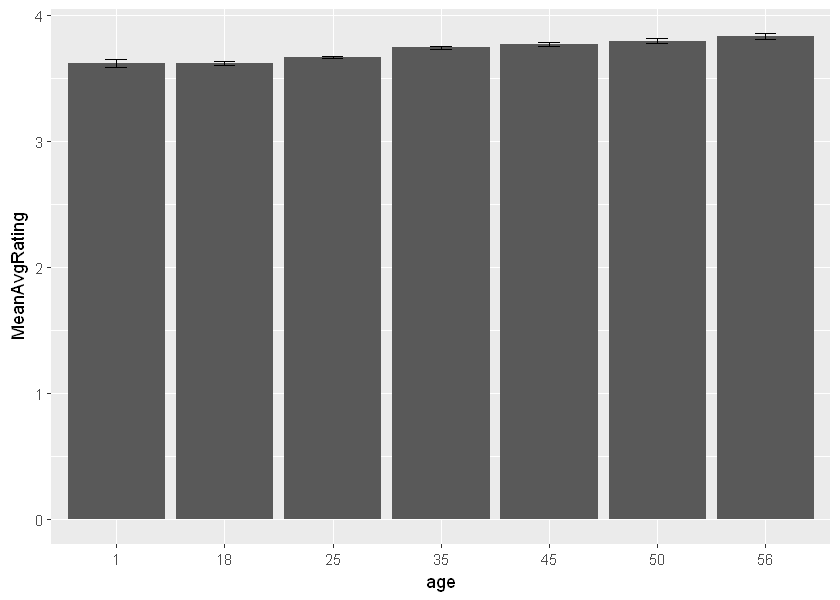

In [23]:
ggplot(age.stats) +
    aes(x=age, y=MeanAvgRating, 
        ymin=MeanAvgRating-AvgRatingErr,
        ymax=MeanAvgRating+AvgRatingErr) +
    geom_bar(stat="identity") + geom_errorbar(width=0.2)

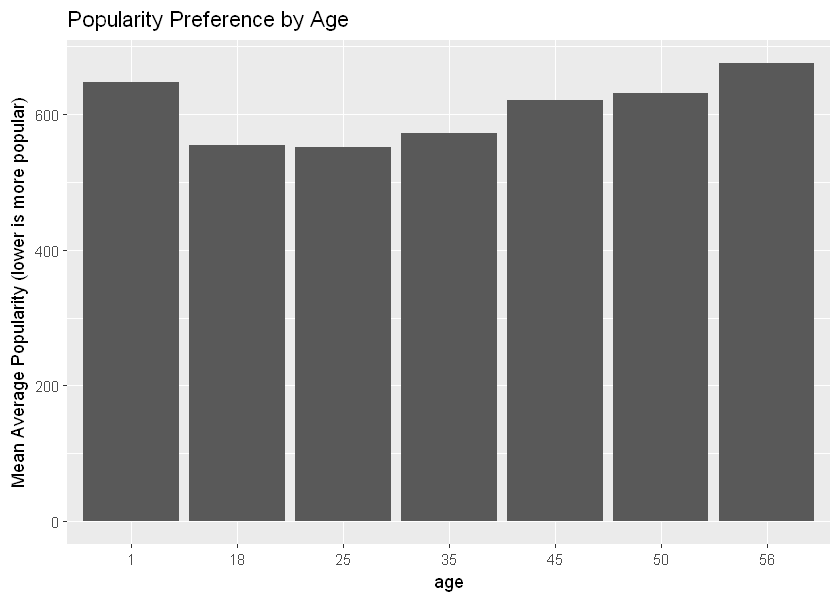

In [24]:
ggplot(age.stats) +
    aes(x=age, y=MeanPop) +
    geom_bar(stat="identity") +
    ylab("Mean Average Popularity (lower is more popular)") +
    ggtitle("Popularity Preference by Age")

We see the same issue here - dominant age brackets like more popular stuff.

## Intersections

Let's look at both age and gender.

In [25]:
cross.stats = user.stats %>%
    group_by(age, gender) %>%
    summarize(nusers=n(),
              MeanCount=mean(RatingCount),
              MeanAvgRating=mean(MeanRating))

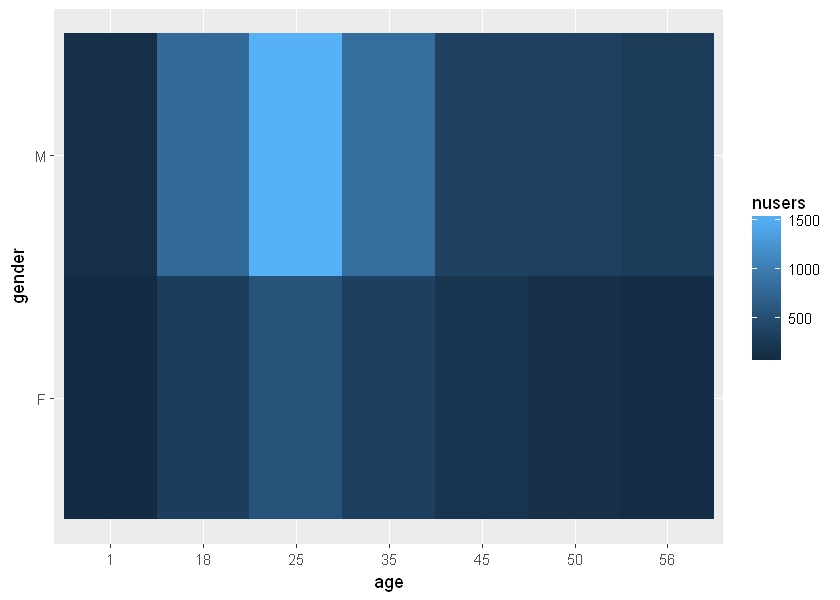

In [26]:
ggplot(cross.stats) +
    aes(x=age, y=gender, fill=nusers) +
    geom_tile()

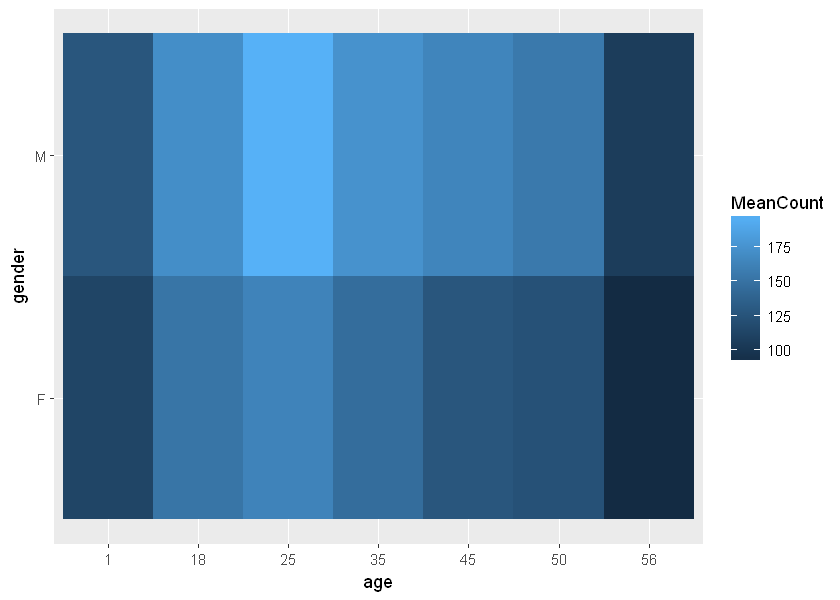

In [27]:
ggplot(cross.stats) +
    aes(x=age, y=gender, fill=MeanCount) +
    geom_tile()

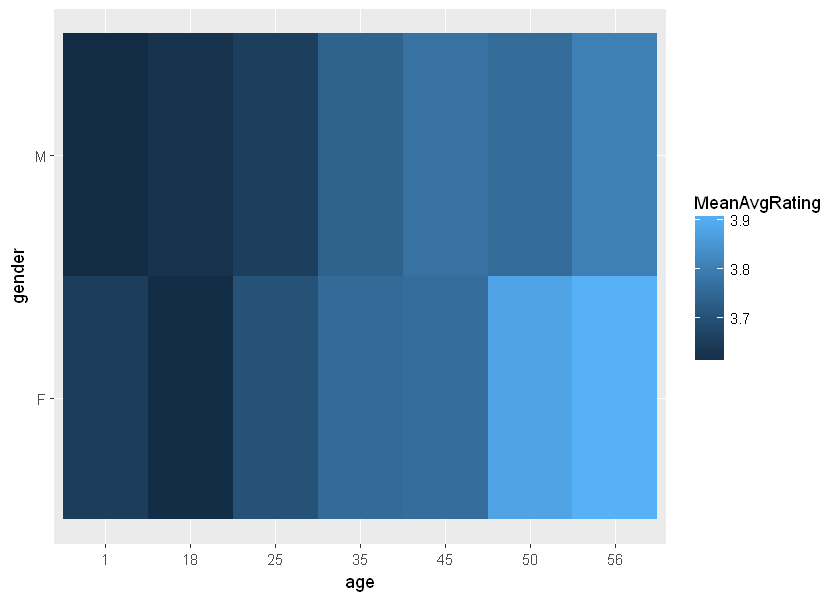

In [28]:
ggplot(cross.stats) +
    aes(x=age, y=gender, fill=MeanAvgRating) +
    geom_tile()